# Exploratory Data Analysis

----
### Things to Consider

**May need more than just 2020 to work with time series data**
- Consider downloading more data from prior years - try to keep it consistent with how much data you have per year
- Graph of sales by month

**May want to split the housing data into tiers**
- This would look like having a T1, T2, T3, T4 tier for each location and house size, etc. in order to separate the houses that need to be renovated versus the houses that are ready to move in
- Finding a way to take this into consideration will be tricky

----

In [102]:
%run src/imports.py

In [2]:
sns.set(rc={'figure.figsize':(16,6)})
sns.set_style('dark')

In [3]:
df = pd.read_pickle('data/modeldata.pkl')

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18278 entries, 0 to 20011
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ZIP OR POSTAL CODE  18278 non-null  int64  
 1   PRICE               18278 non-null  int64  
 2   SQUARE FEET         18278 non-null  float64
 3   LOT SIZE            18278 non-null  float64
 4   YEAR BUILT          18278 non-null  float64
 5   HOA/MONTH           18278 non-null  float64
 6   LATITUDE            18278 non-null  float64
 7   LONGITUDE           18278 non-null  float64
 8   ROOMS               18278 non-null  float64
 9   MONTH               18278 non-null  int64  
 10  YEAR                18278 non-null  int64  
dtypes: float64(7), int64(4)
memory usage: 1.7 MB


## Data Cleaning To Be Done

~~- Take out 333k HOA listing(s)~~
- change datatypes
    - SOLD DATE to datetime
    - ZIP OR POSTAL CODE to category

In [6]:
df.drop(16066,inplace=True)
df.drop(282,inplace=True)

In [7]:
x_plot = df['SOLD DATE']
x_plot = pd.to_datetime(x_plot)
y_plot = df['DAYS ON MARKET']
daysplot = sns.scatterplot(data=df, x=x_plot, y=y_plot)
fig = daysplot.get_figure()
fig.savefig('img/soldplot.png')

KeyError: 'SOLD DATE'

In [8]:
pd.to_datetime(x_plot)

NameError: name 'x_plot' is not defined

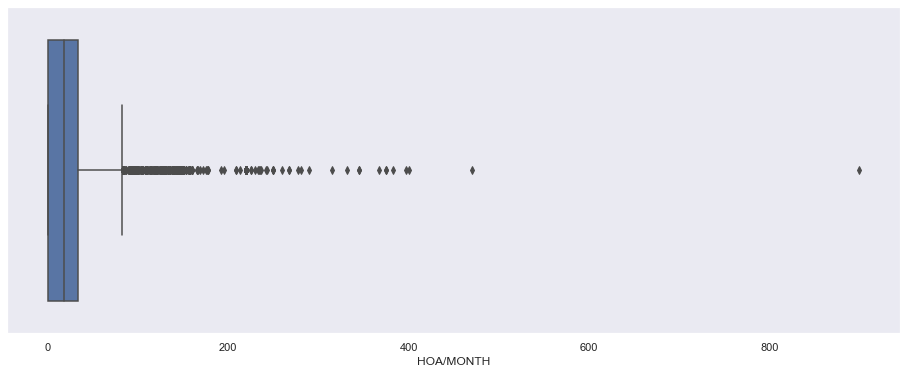

In [9]:
ax = sns.boxplot(x=df['HOA/MONTH'])

In [139]:
pd.DataFrame(np.round(df['HOA/MONTH'].describe(),1))

,HOA/MONTH
count,18276.0
mean,23.9
std,32.0
min,0.0
25%,0.0
50%,18.0
75%,33.0
max,900.0


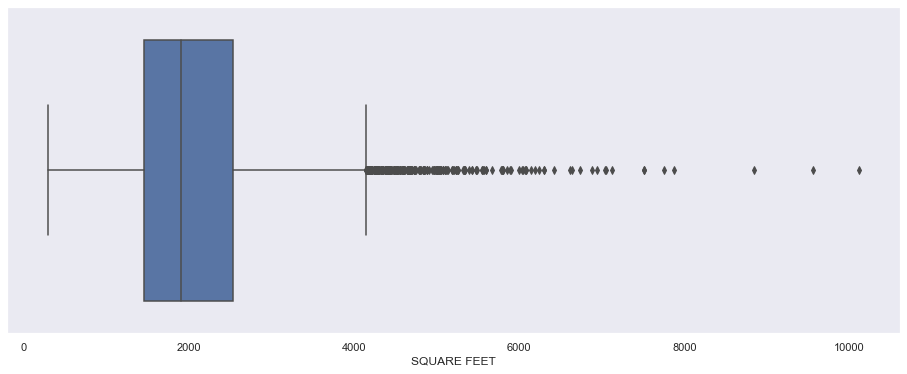

In [35]:
ax = sns.boxplot(x=df['SQUARE FEET'])
fig = ax.get_figure()
fig.savefig('img/sqft.png')

In [135]:
pd.DataFrame(np.round(df['SQUARE FEET'].describe(),1))

,SQUARE FEET
count,18276.0
mean,2049.6
std,798.0
min,288.0
25%,1456.0
50%,1901.0
75%,2531.2
max,10120.0


In [13]:
df['HOA/MONTH'].median()

18.0

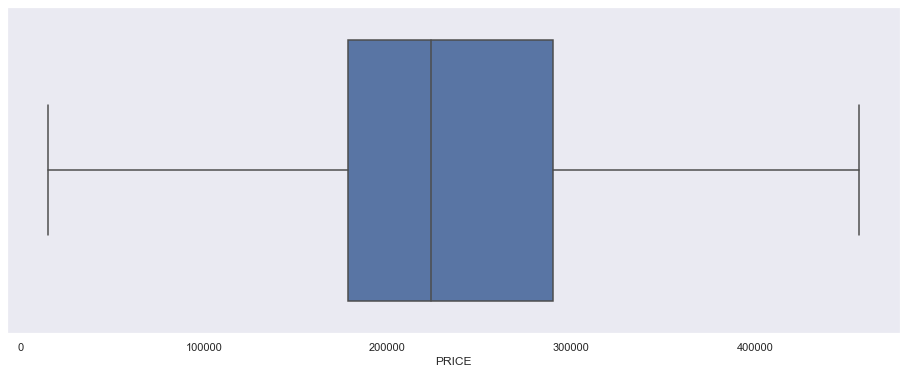

In [142]:
ax = sns.boxplot(x=df['PRICE'],showfliers=False)
fig = ax.get_figure()
fig.savefig('img/price.png')

In [49]:
pd.DataFrame(df['PRICE'].describe().astype('int64'))

,PRICE
count,18276
mean,256671
std,155273
min,15000
25%,178499
50%,223507
75%,290000
max,5000000


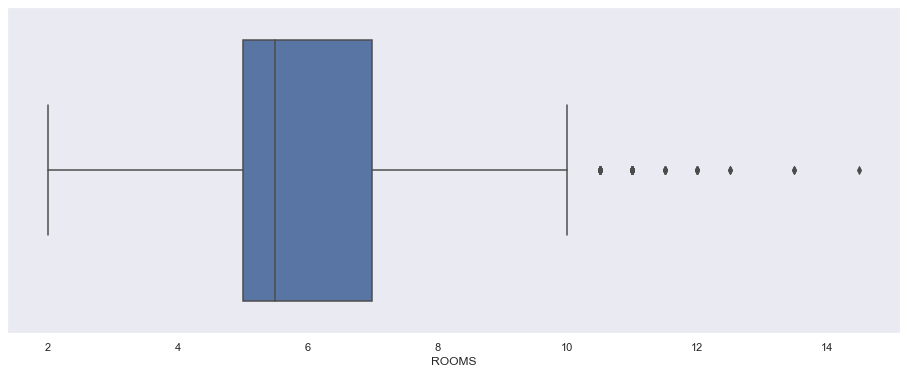

In [31]:
ax = sns.boxplot(x=df['ROOMS'])
fig = ax.get_figure()
fig.savefig('img/rooms.png')

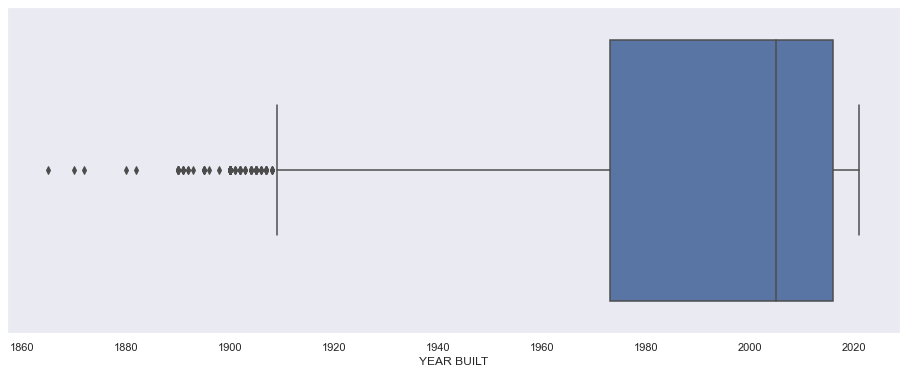

In [50]:
ax = sns.boxplot(x=df['YEAR BUILT'])
fig = ax.get_figure()
fig.savefig('img/year.png')

In [136]:
pd.DataFrame(np.round(df['YEAR BUILT'].describe()))

,YEAR BUILT
count,18276.0
mean,1992.0
std,29.0
min,1865.0
25%,1973.0
50%,2005.0
75%,2016.0
max,2021.0


In [138]:
pd.DataFrame(np.round(df['ROOMS'].describe(),1))

,ROOMS
count,18276.0
mean,5.9
std,1.4
min,2.0
25%,5.0
50%,5.5
75%,7.0
max,14.5


In [49]:
df[df.ROOMS == 27.0]

,ZIP OR POSTAL CODE,PRICE,SQUARE FEET,LOT SIZE,YEAR BUILT,HOA/MONTH,LATITUDE,LONGITUDE,ROOMS,MONTH,YEAR
16066,78202,260000,1493.0,7540.0,1930.0,0.0,29.426547,-98.467292,27.0,11,2020


count    37331.000000
mean         2.413570
std          0.812034
min          0.500000
25%          2.000000
50%          2.000000
75%          3.000000
max         24.000000
Name: BATHS, dtype: float64

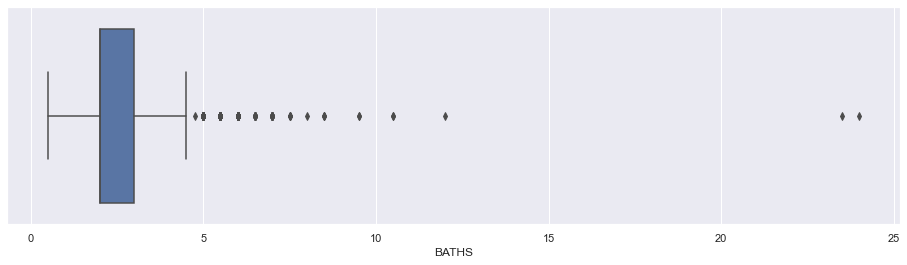

In [59]:
ax = sns.boxplot(x=df['BATHS'])
df['BATHS'].describe()

In [60]:
df[df['BATHS'] == 7.5]

,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,BATHS,...,STATUS,NEXT OPEN HOUSE START TIME,NEXT OPEN HOUSE END TIME,URL (SEE http://www.redfin.com/buy-a-home/comparative-market-analysis FOR INFO ON PRICING),SOURCE,MLS#,FAVORITE,INTERESTED,LATITUDE,LONGITUDE
18,PAST SALE,December-30-2019,Single Family Residential,326 Branch Oak Way,San Antonio,TX,78230,875000,4.0,7.5,...,Sold,NaN,NaN,http://www.redfin.com/TX/Shavano-Park/326-Bran...,HARMLS,94445848.0,N,Y,29.569196,-98.556351
33,PAST SALE,December-4-2020,Single Family Residential,602 Bentley Mnr,Shavano Park,TX,78249,1825000,7.0,7.5,...,Sold,NaN,NaN,http://www.redfin.com/TX/Shavano-Park/602-Bent...,Sabor,1355770.0,N,Y,29.589252,-98.567337
63,PAST SALE,July-31-2019,Single Family Residential,238 Winding Ln,Shavano Park,TX,78231,2600000,5.0,7.5,...,Sold,NaN,NaN,http://www.redfin.com/TX/San-Antonio/238-Windi...,Sabor,1362491.0,N,Y,29.598340,-98.550515
275,PAST SALE,February-12-2021,Single Family Residential,11661 Elm Ridge Rd,San Antonio,TX,78230,920000,6.0,7.5,...,Sold,NaN,NaN,http://www.redfin.com/TX/San-Antonio/11661-Elm...,Sabor,1496163.0,N,Y,29.547869,-98.549656


In [61]:
df['SOLD DATE'] = pd.to_datetime(df['SOLD DATE'])

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18276 entries, 0 to 20011
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ZIP OR POSTAL CODE  18276 non-null  int64  
 1   PRICE               18276 non-null  int64  
 2   SQUARE FEET         18276 non-null  float64
 3   LOT SIZE            18276 non-null  float64
 4   YEAR BUILT          18276 non-null  float64
 5   HOA/MONTH           18276 non-null  float64
 6   LATITUDE            18276 non-null  float64
 7   LONGITUDE           18276 non-null  float64
 8   ROOMS               18276 non-null  float64
 9   MONTH               18276 non-null  int64  
 10  YEAR                18276 non-null  int64  
dtypes: float64(7), int64(4)
memory usage: 1.7 MB


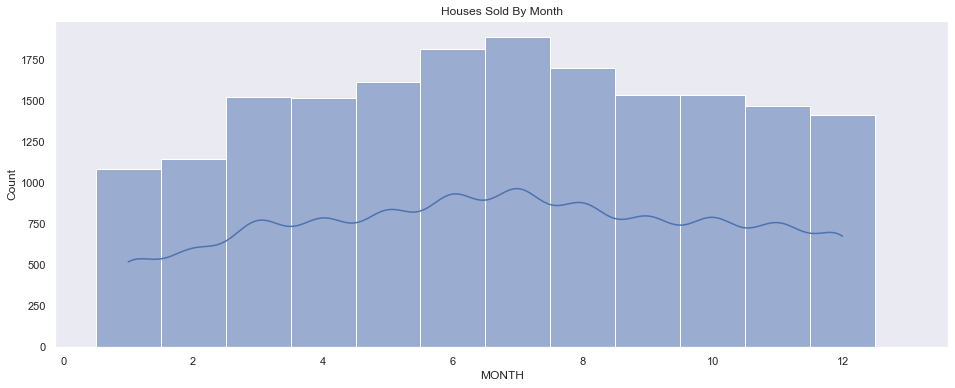

In [67]:
sns_plot = sns.histplot(data=df['MONTH'],kde=True,shrink=2,binrange=[1,13],binwidth=.5).set_title('Houses Sold By Month')
fig = sns_plot.get_figure()
fig.savefig('img/housesbymonth.png')

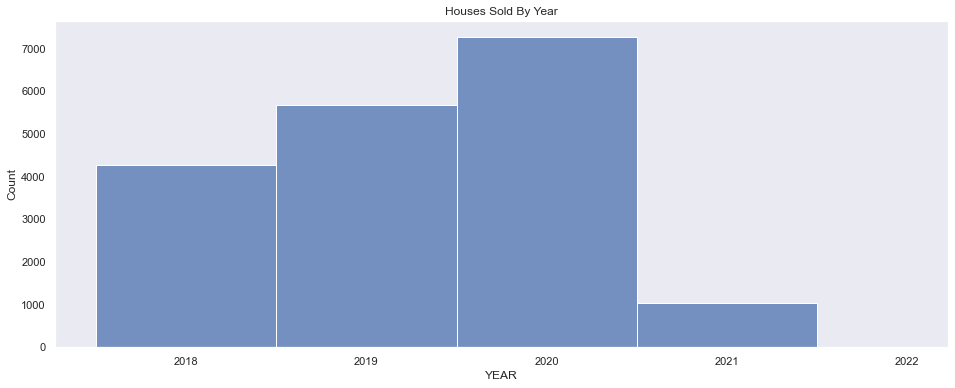

In [74]:
sns_plot = sns.histplot(data=df['YEAR'],kde=False,shrink=2,binrange=[2018,2022],binwidth=.5).set_title('Houses Sold By Year')
fig = sns_plot.get_figure()
fig.savefig('img/housesbyyear.png')

In [66]:
fig = sns_plot.get_figure()
fig.savefig("img/solddate.png")

In [45]:
# Choropleth map of house locations???

In [33]:
# stacked bar of months

In [52]:
df.reset_index(inplace=True)

In [59]:
df['MONTH'] = pd.DatetimeIndex(df['SOLD DATE']).month

In [63]:
df.dropna(inplace=True)

In [64]:
df['MONTH'] = df['MONTH'].astype(int)

In [66]:
df

,index,SALE TYPE,SOLD DATE,PROPERTY TYPE,ADDRESS,CITY,STATE OR PROVINCE,ZIP OR POSTAL CODE,PRICE,BEDS,...,LOT SIZE,YEAR BUILT,DAYS ON MARKET,$/SQUARE FEET,HOA/MONTH,STATUS,MLS#,LATITUDE,LONGITUDE,MONTH
0,0,PAST SALE,2020-10-15,Single Family Residential,17751 Rancho Diana,San Antonio,TX,78255,955000,4.0,...,33976.0,2019.0,150.0,195.0,55.0,Sold,1430151.0,29.612013,-98.654187,10
1,1,PAST SALE,2019-06-25,Single Family Residential,18010 Granite Hill Dr,San Antonio,TX,78255,670000,6.0,...,20908.0,2008.0,628.0,149.0,50.0,Sold,1369710.0,29.612978,-98.654429,6
2,2,PAST SALE,2019-05-24,Single Family Residential,7827 Hermosa Hl,San Antonio,TX,78256,465000,5.0,...,7840.0,2010.0,660.0,128.0,82.0,Sold,1332273.0,29.646189,-98.638447,5
3,3,PAST SALE,2020-09-25,Single Family Residential,6702 Frua Ln,San Antonio,TX,78257,345000,2.0,...,5662.0,2005.0,170.0,173.0,230.0,Sold,1467693.0,29.647801,-98.614186,9
4,4,PAST SALE,2020-06-11,Single Family Residential,315 Persimmon Trl,San Antonio,TX,78256,337500,4.0,...,9583.0,2004.0,276.0,156.0,54.0,Sold,1451684.0,29.650304,-98.629082,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37352,223,PAST SALE,2020-03-16,Single Family Residential,1147 Hedgestone Dr,San Antonio,TX,78258,275000,4.0,...,5662.0,1986.0,363.0,122.0,110.0,Sold,1438057.0,29.646371,-98.497260,3
37353,224,PAST SALE,2019-05-02,Single Family Residential,25167 Flying Arrow,San Antonio,TX,78258,335000,5.0,...,7840.0,1994.0,682.0,136.0,16.0,Sold,1370938.0,29.644913,-98.494773,5
37354,225,PAST SALE,2020-08-28,Single Family Residential,25270 Flaming Arrow,San Antonio,TX,78258,335000,5.0,...,12196.0,1988.0,198.0,102.0,23.0,Sold,1466828.0,29.644785,-98.493958,8
37355,226,PAST SALE,2021-02-04,Single Family Residential,21610 Iron Ridge Ct,San Antonio,TX,78258,350000,3.0,...,7727.0,1999.0,38.0,150.0,38.0,Sold,1499022.0,29.643171,-98.503006,2


# Correlation Heatmap

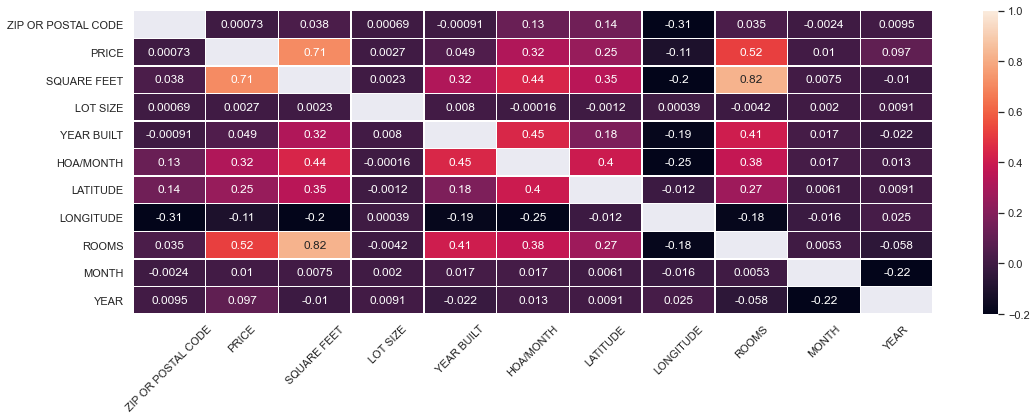

In [167]:
mask = np.identity(n=11)
heatmap = sns.heatmap(df.corr(),linewidths=0.5,annot=True,mask=mask,vmin=-0.2,vmax=1)
plt.xticks(rotation=45)
plt.tight_layout();
heatmap = heatmap.get_figure()
heatmap.savefig('img/heatmap.png')

In [169]:
high_corr = df.corr() > 0.5

In [170]:
identity = np.identity(11)

In [171]:
mask_high = high_corr.replace([False,True],[1,0])

In [172]:
mask = mask_high + identity
mask = mask.astype(int)

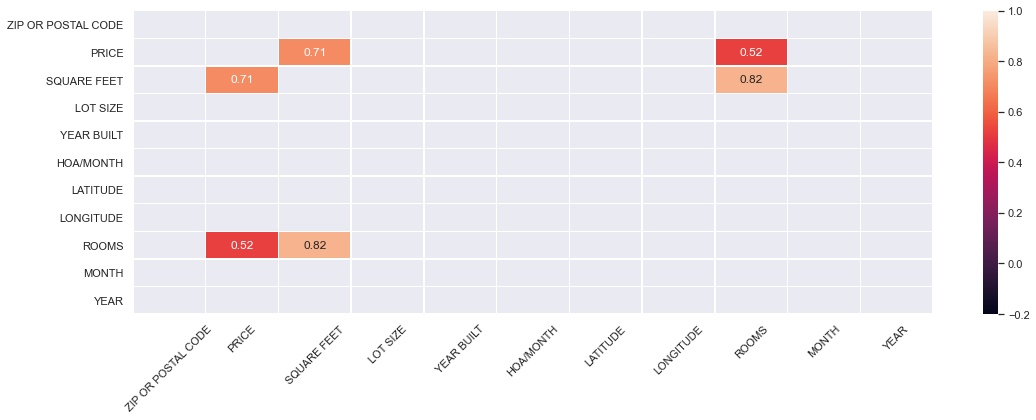

In [173]:
heatmap = sns.heatmap(df.corr(),linewidths=0.5,annot=True,mask=mask,vmin=-0.2,vmax=1)
plt.xticks(rotation=45)
plt.tight_layout();
heatmap = heatmap.get_figure()
heatmap.savefig('img/heatmap2.png')

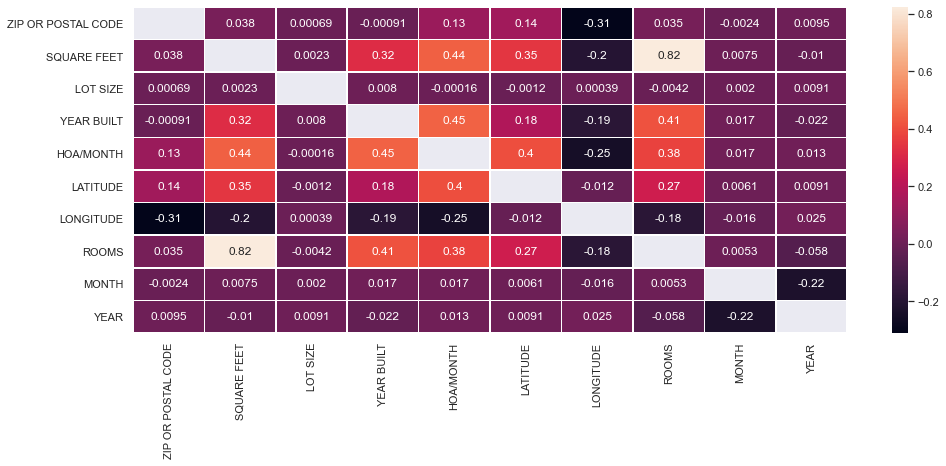

In [126]:
mask = np.identity(10)
sns.heatmap(df.drop('PRICE',axis=1).corr(),linewidths=0.5,annot=True,mask=mask);

In [121]:
corr = np.corrcoef(np.random.randn(10, 200))
print(corr)
print("-------")
mask = np.zeros_like(corr)
print(mask)
print('-------')
mask[np.triu_indices_from(mask)] = True
print(mask)
np.identity(n=11)

[[ 1.         -0.00941863  0.0793742  -0.01088272 -0.08775855 -0.0940489
   0.02814861 -0.03277748  0.07975297 -0.01019951]
 [-0.00941863  1.          0.01648682  0.09995158  0.00858529 -0.00937068
  -0.04916566  0.07849209  0.02721091 -0.05451491]
 [ 0.0793742   0.01648682  1.         -0.06354226 -0.2048478  -0.0624756
   0.0333554   0.02533061  0.0129984   0.13227949]
 [-0.01088272  0.09995158 -0.06354226  1.          0.09585184 -0.00575879
   0.01403219  0.1326524   0.06612514 -0.10517984]
 [-0.08775855  0.00858529 -0.2048478   0.09585184  1.         -0.04978297
   0.12885877  0.03418975  0.07838788 -0.03815811]
 [-0.0940489  -0.00937068 -0.0624756  -0.00575879 -0.04978297  1.
   0.10455811 -0.05149757 -0.08125956  0.0542838 ]
 [ 0.02814861 -0.04916566  0.0333554   0.01403219  0.12885877  0.10455811
   1.         -0.04591076  0.06944507 -0.162301  ]
 [-0.03277748  0.07849209  0.02533061  0.1326524   0.03418975 -0.05149757
  -0.04591076  1.          0.13742296 -0.07699506]
 [ 0.07975

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

Obtained from https://towardsdatascience.com/better-heatmaps-and-correlation-matrix-plots-in-python-41445d0f2bec  
Courtesy of **Drazen Zaric** on _Medium.com_

['ZIP OR POSTAL CODE' 'PRICE' 'SQUARE FEET' 'LOT SIZE' 'YEAR BUILT'
 'HOA/MONTH' 'LATITUDE' 'LONGITUDE' 'ROOMS' 'MONTH' 'YEAR']
                    ZIP OR POSTAL CODE     PRICE  SQUARE FEET  LOT SIZE  \
ZIP OR POSTAL CODE            1.000000  0.001201     0.040783  0.000642   
PRICE                         0.001201  1.000000     0.711091  0.002471   
SQUARE FEET                   0.040783  0.711091     1.000000  0.002566   
LOT SIZE                      0.000642  0.002471     0.002566  1.000000   
YEAR BUILT                    0.004338  0.037087     0.322638  0.008088   
HOA/MONTH                     0.006371  0.002023     0.006627 -0.000077   
LATITUDE                      0.145813  0.248531     0.359766 -0.000834   
LONGITUDE                    -0.308991 -0.100810    -0.196172  0.000331   
ROOMS                         0.036469  0.512380     0.818325 -0.003585   
MONTH                        -0.002429  0.006323     0.005348  0.001945   
YEAR                          0.014534  0.09356

ValueError: The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of ticklabels (11).

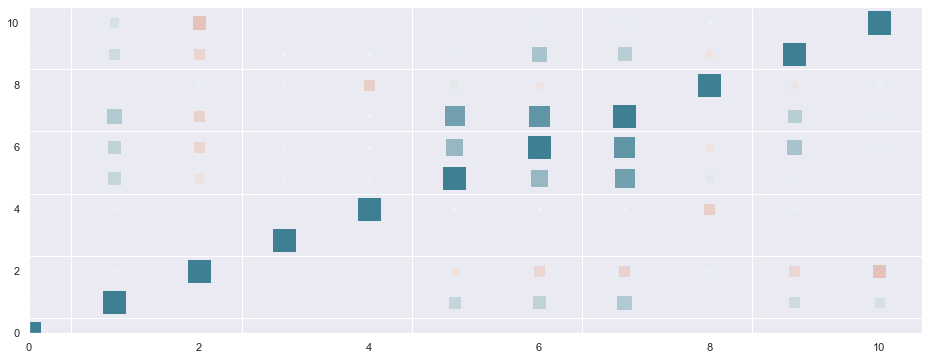

In [109]:
# Step 1 - Make a scatter plot with square markers, set column names as labels

def value_to_color(val):
    val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
    ind = int(val_position * (n_colors - 1)) # target index in the color palette
    return palette[ind]

n_colors = 256 # Use 256 colors for the diverging color palette
palette = sns.diverging_palette(20, 220, n=n_colors) # Create the palette
color_min, color_max = [-1, 1] # Range of values that will be mapped to the palette, i.e. min and max possible correlation



def heatmap(x, y, size,color):
    fig, ax = plt.subplots()
    
    # Mapping from column names to integer coordinates
    x_labels = [v for v in sorted(x.unique())]
    y_labels = [v for v in sorted(y.unique())]
    
    x_to_num = {p[1]:p[0] for p in enumerate(x_labels)} 
    y_to_num = {p[1]:p[0] for p in enumerate(y_labels)} 

    
    size_scale = 500
    ax.scatter(
    x=x.map(x_to_num),
    y=y.map(y_to_num),
    s=size * size_scale,
    c=color.apply(value_to_color), # Vector of square color values, mapped to color palette
    marker='s'
)
    
    # Show column labels on the axes
    ax.grid(False, 'major')
    ax.grid(True, 'minor')
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)


    ax.set_xlim([0, max([v for v in x_to_num.values()]) + 0.5]) 
    ax.set_ylim([0, max([v for v in y_to_num.values()]) + 0.5])
    
    # fixing xticks with matplotlib.ticker "FixedLocator"
    ticks_loc_x = ax.get_xticks().tolist()
    ax.xaxis.set_major_locator(mticker.FixedLocator(ticks_loc_x))
    ax.set_xticklabels(x_labels, rotation=45, horizontalalignment='right')
    
    # fixing yticks with matplotlib.ticker "FixedLocator"
    ticks_loc_y = ax.get_yticks().tolist()
    ax.yaxis.set_major_locator(mticker.FixedLocator(ticks_loc_y))
    ax.set_yticklabels(y_labels)
    
    
    # Show column labels on the axes

    

    
data_df = pd.read_pickle('data/modeldata.pkl')
columns = np.array(data_df.columns)
print(columns)
corr = data_df[columns].corr()
print(corr)
corr = pd.melt(corr.reset_index(), id_vars='index') # Unpivot the dataframe, so we can get pair of arrays for x and y
print(corr)
corr.columns = ['x', 'y', 'value']
print(corr.columns)
heatmap(
    x=corr['x'],
    y=corr['y'],
    size=corr['value'].abs(),
    color=corr['value']
)







